<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.859 · Visualización de datos · PEC2</p>
<p style="margin: 0; text-align:right;">2022-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC2: Estudio de técnicas de visualización de datos

En esta actividad el estudiante tendrá que crear tres pequeñas visualizaciones usando técnicas diferentes que le serán asignadas, recibiréis un correo de vuestro profesor con la selección. Cada estudiante tendrá que escoger unos datos idóneos para cada una de las técnicas propuestas y decidir con qué software las crea. Los datos se podrán escoger de cualquier fuente de datos abiertos. El estudiante publicará las representaciones a Internet y las presentará en un video. 

 <ol start="1">
  <li>Presentaos siguiendo el esquema de la PEC 1.</li>
  <li>[5%] Indicad donde está colgada la visualización para poder acceder.</li>
  <li>[30%] Definid cada técnica de visualización de forma general: nombre, origen, descripción/funcionamiento, ejemplos de aplicación, etc.</li>
  <li>[10%] Describid el tipo de datos que se pueden representar con cada técnica ¿(datos cuantitativos, cualitativos? ¿Qué estructura tienen que tener para cada técnica?). Explicad las limitaciones en cuanto a datos (¿hay medida mínima y máxima del juego de datos para cada técnica?).
  <li>[20%] Haced una representación con cada una de las técnicas usando un conjunto de datos abiertos ( más abajo disponéis de algunas fuentes de datos abiertos). En total hay que hacer 3 representaciones simples con 3 conjuntos de datos escogidos por el estudiante.</li>
  <li>[30%] Comentad brevemente las tres representaciones indicando qué se representa y qué o qué aspectos muestra o demuestra cada representación.</li>
  <li>[5%] Cada una de las tres presentaciones tienen que tener una duración de unos 2-3 minutos. En total, el video (único) con las tres técnicas no puede exceder los 7 minutos. Se penalizará salir de este rango, porque se valora la capacidad de síntesis y de comunicación.</li>
</ol>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Desiderio Martí Alcaraz<br/>
    <strong>DNI:</strong> 52769480M<br/>
    <strong>Correo:</strong> dmartial@uoc.edu<br/>
</div>

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

# 1. Carga del conjunto de datos (1 punto)

A lo largo de esta práctica utilizaremos el conjunto de datos [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/forest+fires), el cual contiene información relevante acerca de distintos incendios acaecidos en el noreste de Portugal. Cada muestra del conjunto de datos estará formada por el área de bosque quemada y el valor de múltiples factores que podrían ser los detonantes o catalizadores del fuego. El conjunto de datos lo encontraréis en el siguiente enlace: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv.

Nota: para los ejercicios de esta PEC, utilizaremos como variable objetivo el "area": número de hectáreas afectadas por el incendio. El resto de variables del conjunto de datos conformarán los atributos descriptivos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> cargad el conjunto de datos "Forest Fires Data Set" utilizando el método "read_csv" de "pandas" y mostrad:
<ul>
  <li>El número de filas (muestras) del conjunto de datos.</li>
  <li>El número y nombre de los atributos descriptivos (variables que podrían ser usadas para predecir la variable objetivo).</li>
  <li>Contrastad dichos atributos con los que se describen en la página web del conjunto de datos.</li>
  <li>Verificad si hay o no "missing values" y en qué columnas.</li>
</ul>
Sugerencia: separad el conjunto de datos original en las variables "X" (atributos descriptivos) e "y" (variable objetivo).
</div>

In [2]:
filename = "forestfires.csv"

df = pd.read_csv(filename)


#El número de filas (muestras) del conjunto de datos.
print(f"Número de filas: {len(df)}")

#El número y nombre de los atributos descriptivos (variables que podrían ser usadas para predecir la variable objetivo).
dfa = df.drop(columns="area")    #Dataframe sin la variable objetivo

dfa_num = df.drop(columns="month").drop(columns="day")   #Dataframe sin la variables categóricas

print("Descripción estadísitca:\n", dfa.describe())
print("Shape:", dfa.shape)
print("Tipos de datos:", dfa.dtypes)

#Contrastad dichos atributos con los que se describen en la página web del conjunto de datos.
df.info()

#Verificad si hay o no "missing values" y en qué columnas.
print(f"Missing values: {df.isna().sum().sum()}")


Número de filas: 517
Descripción estadísitca:
                 X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain  
count  517.000000  517.000000  517.000000  517.000000  
mean    18.889168   44.288201    4.017602    0.021663  
std      5.806625   16.317469    1.791653    0.295959  

# 2. Análisis de los datos (3 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> realizad un análisis estadístico básico: 
<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calculad la frecuencia.</li>
      <li>Haced un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calculad estadísticos descriptivos básicos: media, mediana, desviación estandard, ...</li>
      <li>Haced un histograma.</li>
    </ul>
  <li>Variables geoespaciales:</li>
    <ul>
      <li>Haced un histograma bidimensional.</li>
    </ul>
</ul>
Sugerencia: podéis usar la librería "pandas" y sus funciones "describe" y "value_counts", así como las funciones "bar", "hist" y "hist2d" de matplotlib.
</div>

In [3]:
cat_columns = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

print('Variables categóricas: ',cat_columns)
print('Varaibles numéricas: ',num_columns)

Variables categóricas:  ['month', 'day']
Varaibles numéricas:  ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']


<strong>Variables categóricas:</strong>

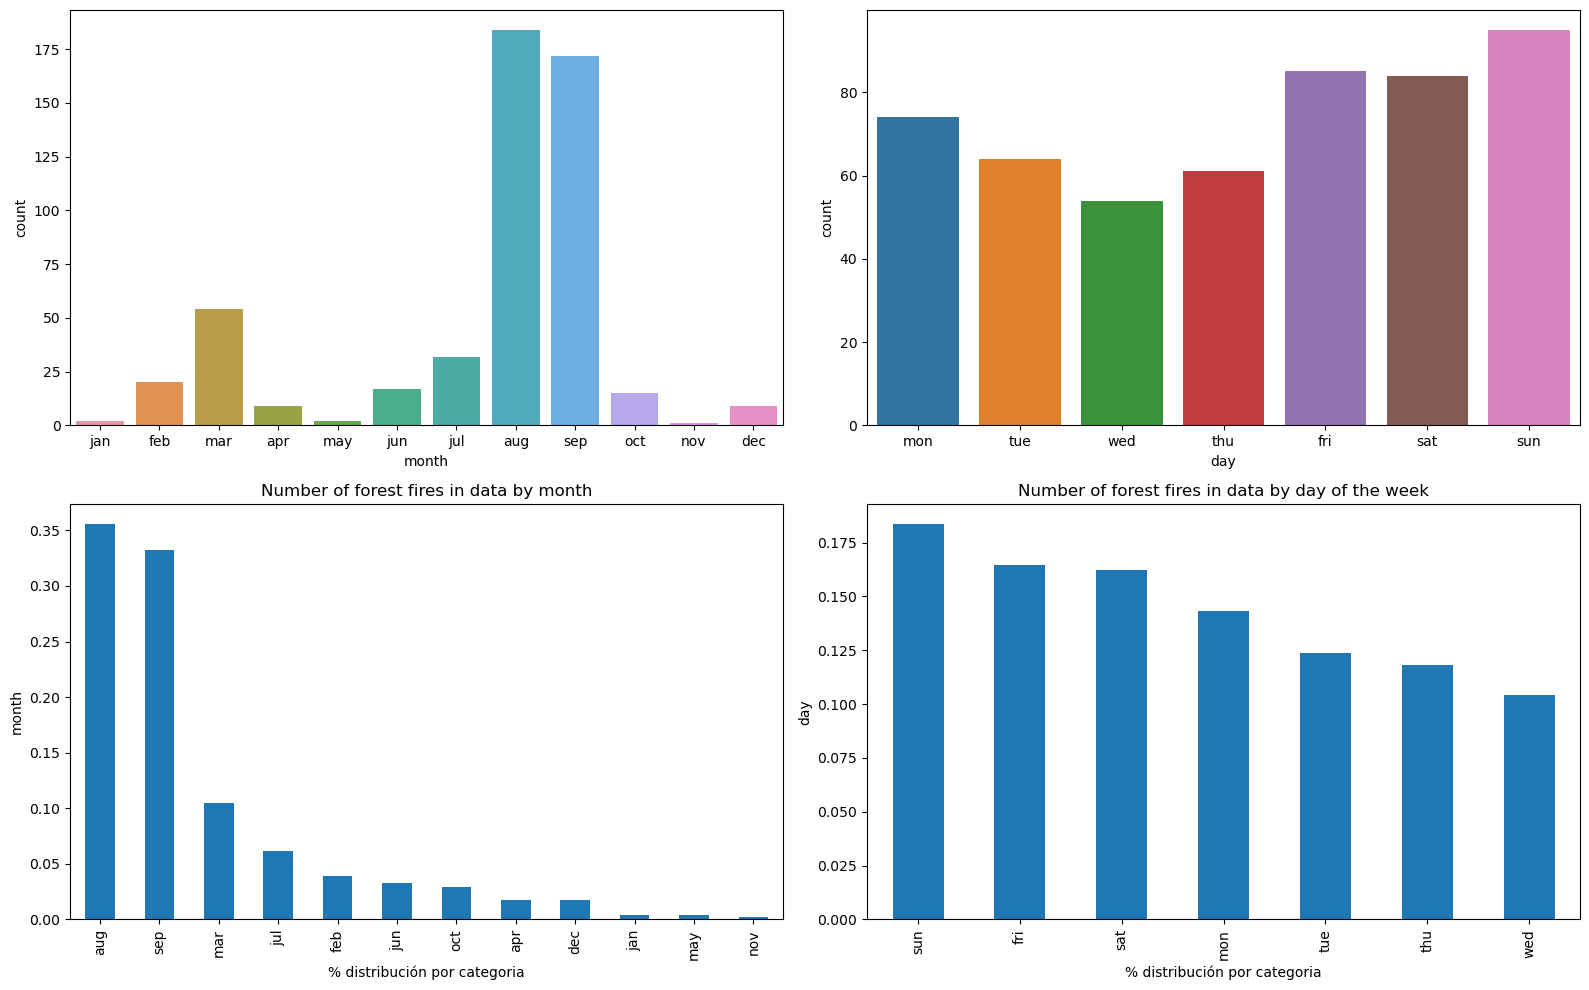

In [4]:
plt.figure(figsize=(16,10))

#    ---- month ------
#ordenamos
months_of_year = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
dfa['month'] = pd.Categorical(dfa['month'], categories=months_of_year, ordered=True)
dfa = dfa.sort_values('month')
dfa["month"] = dfa["month"].astype('object')

plt.subplot(2,2,1)
sns.countplot(data=dfa,x='month')

plt.subplot(2,2,1+2)
df['month'].value_counts(normalize=True).plot.bar()
plt.ylabel('month')
plt.xlabel('% distribución por categoria')
plt.title("Number of forest fires in data by month")

#    ---- day ------
#ordenamos
days_of_week = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
dfa['day'] = pd.Categorical(dfa['day'], categories=days_of_week, ordered=True)
dfa = dfa.sort_values('day')
dfa["day"] = dfa["day"].astype('object')

plt.subplot(2,2,2)
sns.countplot(data=dfa,x='day')


plt.subplot(2,2,2+2)
df['day'].value_counts(normalize=True).plot.bar()
plt.ylabel('day')
plt.xlabel('% distribución por categoria')
plt.title("Number of forest fires in data by day of the week")
    
plt.tight_layout()
plt.show()

<strong>Variables numéricas:</strong>

Calculad estadísticos:
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain  
count  517.000000  517.000000  517.000000  517.000000  
mean    18.889168   44.288201    4.017602    0.021663  
std      5.806625   16.317469    1.791653    0.295959  
min      2.200000   15.

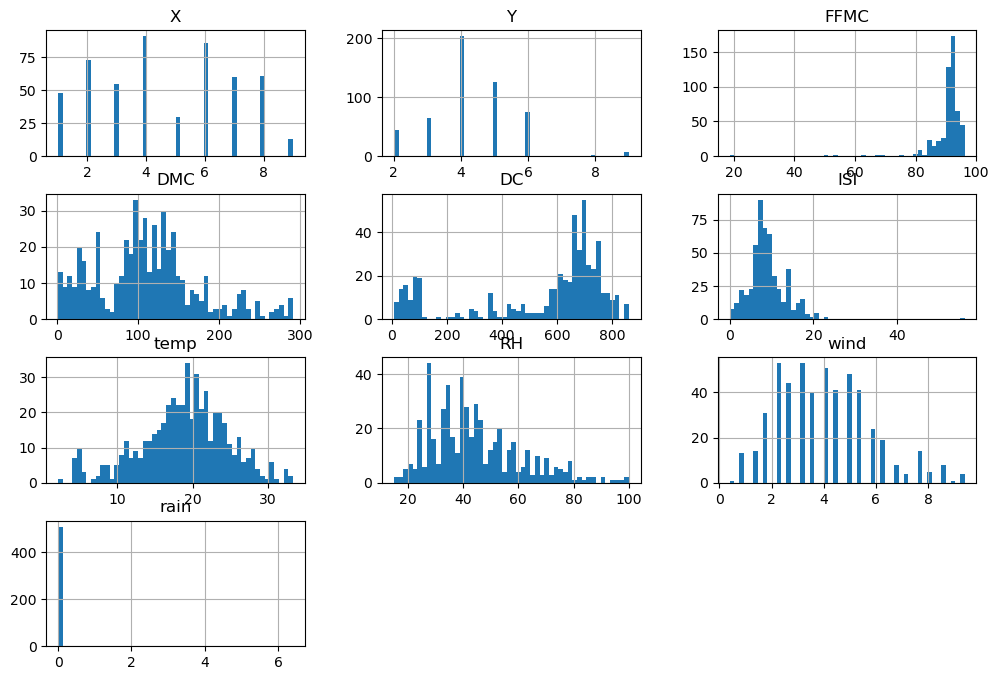


Histograma área:


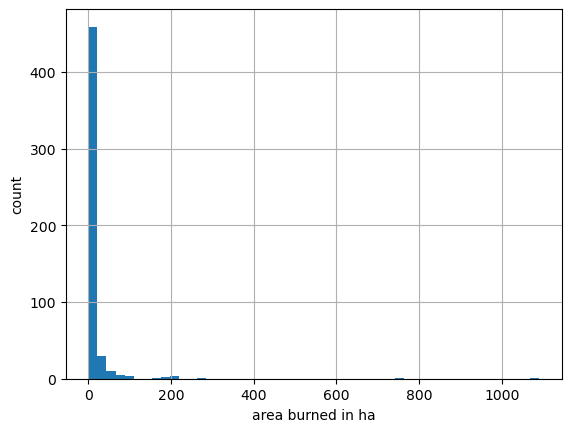

In [5]:
import matplotlib.pyplot as plt
#variables numéricas

print(f"Calculad estadísticos:")
print(dfa.describe())

print(f"\nHistogramas numéricas:")
dfa.hist(bins=50, figsize=(12, 8))
plt.show()

print(f"\nHistograma área:")
df['area'].hist(bins=50)
plt.xlabel('area burned in ha')
plt.ylabel('count')
plt.show()

<strong>Variables geoespaciales:</strong>

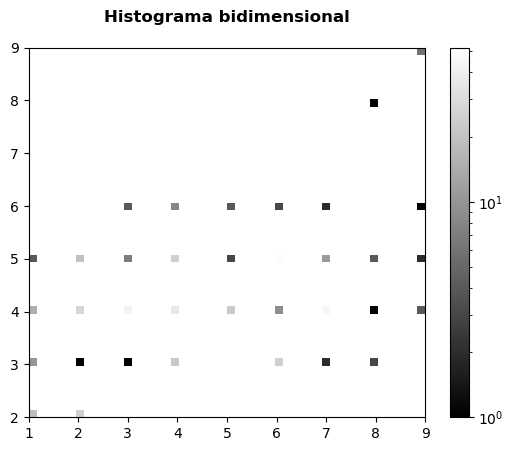

In [6]:
geo_columns = dfa.loc[:, ["X","Y"]]
geo_columns

plt.hist2d(geo_columns["X"], geo_columns["Y"],
           bins=(50, 50), 
           norm = colors.LogNorm(), 
           cmap ="gray")
  
plt.title('Histograma bidimensional\n', fontweight ="bold")
cb = plt.colorbar()
  
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comentad los resultados.
</div>

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid black; padding: 0.5em;">
<strong>hola</strong>
    Los 2 atributos que tienen una correlación más fuerte (temp, RH)<br/>
    Los 3 con una correlación más débil (rain, ISI)<br>
</div>

## 2.2 Análisis exploratorio de los datos

En este apartado exploraremos la relación de los atributos descriptivos con la variable objetivo.
<br>
Nota: trataremos de forma diferente los atributos categóricos de los numéricos

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> para cada variable categórica, mostrad un gráfico donde superpondréis para cada categoría un histograma de los valores de la variable objetivo. Añadid una leyenda para saber a qué clase corresponde cada histograma
    
La finalidad es observar como se distribuye el valor de la variable objetivo en función de los valores de las categorías de cada variable categórica. De esta forma, identificaremos de manera visual y rápida si este atributo categórico está relacionado o no con diferentes valores de la respuesta.

<hr>
Sugerencia: podéis usar la función "hist" de la librería "matplotlib", así como su parámetro "alpha" (transparencia) para que se aprecien los histogramas superpuestos.
</div>

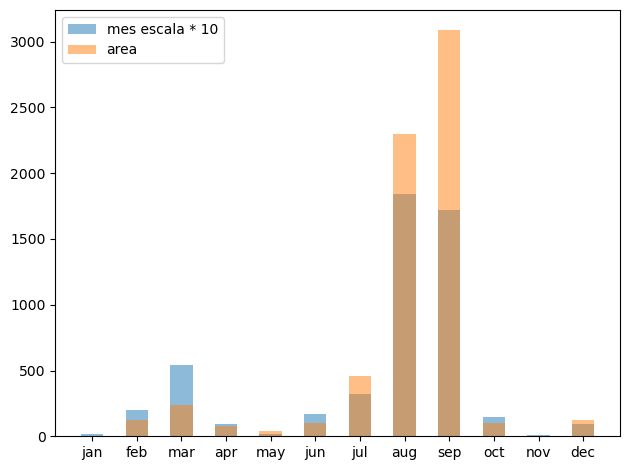

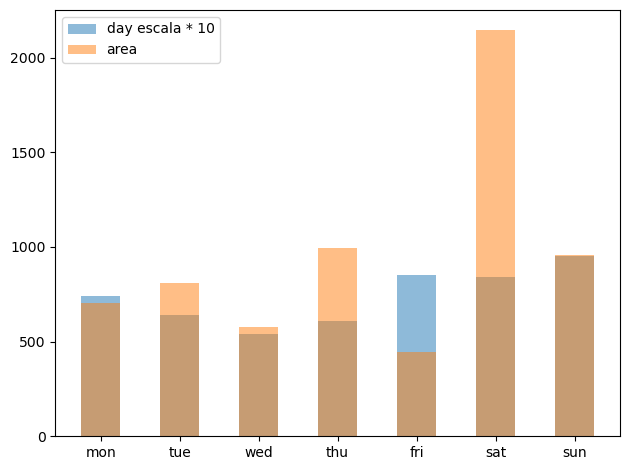

In [7]:
groupedLeft = df.loc[:,["month","area"]].groupby('month',sort=True).count()
groupedRight = df.loc[:,["month","area"]].groupby('month')['area'].sum()

result = pd.merge(groupedLeft, groupedRight, on="month")
result = result.reindex(index = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

bins = 1

result['area_x']=result['area_x']*10

plt.bar(result.index, result['area_x'], width=0.5, alpha = 0.5, label='mes escala * 10')
plt.bar(result.index, result['area_y'], width=0.5, alpha = 0.5, label='area')

plt.legend(loc='upper left')
    
plt.tight_layout()
plt.show()


#    ---- day ------
groupedLeft = df.loc[:,["day","area"]].groupby('day',sort=True).count()
groupedRight = df.loc[:,["day","area"]].groupby('day')['area'].sum()

result = pd.merge(groupedLeft, groupedRight, on="day")
result = result.reindex(index = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])

bins = 1

result['area_x']=result['area_x']*10

plt.bar(result.index, result['area_x'], width=0.5, alpha = 0.5, label='day escala * 10')
plt.bar(result.index, result['area_y'], width=0.5, alpha = 0.5, label='area')

plt.legend(loc='upper left')
    
plt.tight_layout()
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando los histogramas, ¿te parece que los atributos categóricos tendrán algún peso a la hora de predecir la variable objetivo? ¿Porqué? 
</div>

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid black; padding: 0.5em;">
    En los gráficos se peude observar que:
    <ul>
        <li><strong>Month: </strong>Hay una pequeña relación entre el área quemada y meses de agosto y septiembre.</li>
        <li><strong>Day:</strong>Hay una pequeña relación entre el área quemada y los sábados.</li>
    </ul>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> para cada categoría de las variables categóricas calculad los valores de media y desviación estandard de la variable objetivo. La finalidad de este ejercicio es verificar numéricamente las diferencias identificadas anteriormente de forma visual.
<hr>
Sugerencia: podéis usar las funciones "mean" y "std" de la librería "numpy".
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> calculad y mostrad la correlación entre todos los atributos numéricos (incluyendo los geoespaciales) y la respuesta.
</div>

In [8]:
print("Correlación:\n", dfa_num.corr(method='pearson'))

Correlación:
              X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258   
Y     0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103   
FFMC -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC  -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594   
DC   -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI   0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287   
temp -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000   
RH    0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind  0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain  0.065387  0.033234  0.056702  0.074790  0.035861  0.067668  0.069491   
area  0.063385  0.044873  0.040122  0.072994  0.049383  0.008258  0.097844   

            RH      wind      rain      area  
X 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> representad gráficamente las relaciones entre todas las parejas de las variables numéricas del conjunto de datos (incluyendo las geoespaciales). La finalidad de este ejercicio es poder observar y analizar las correlaciones entre las variables de manera gráfica.
<hr>Sugerencia: podéis usar la función "pairplot" de la librería 'seaborn'.
</div>

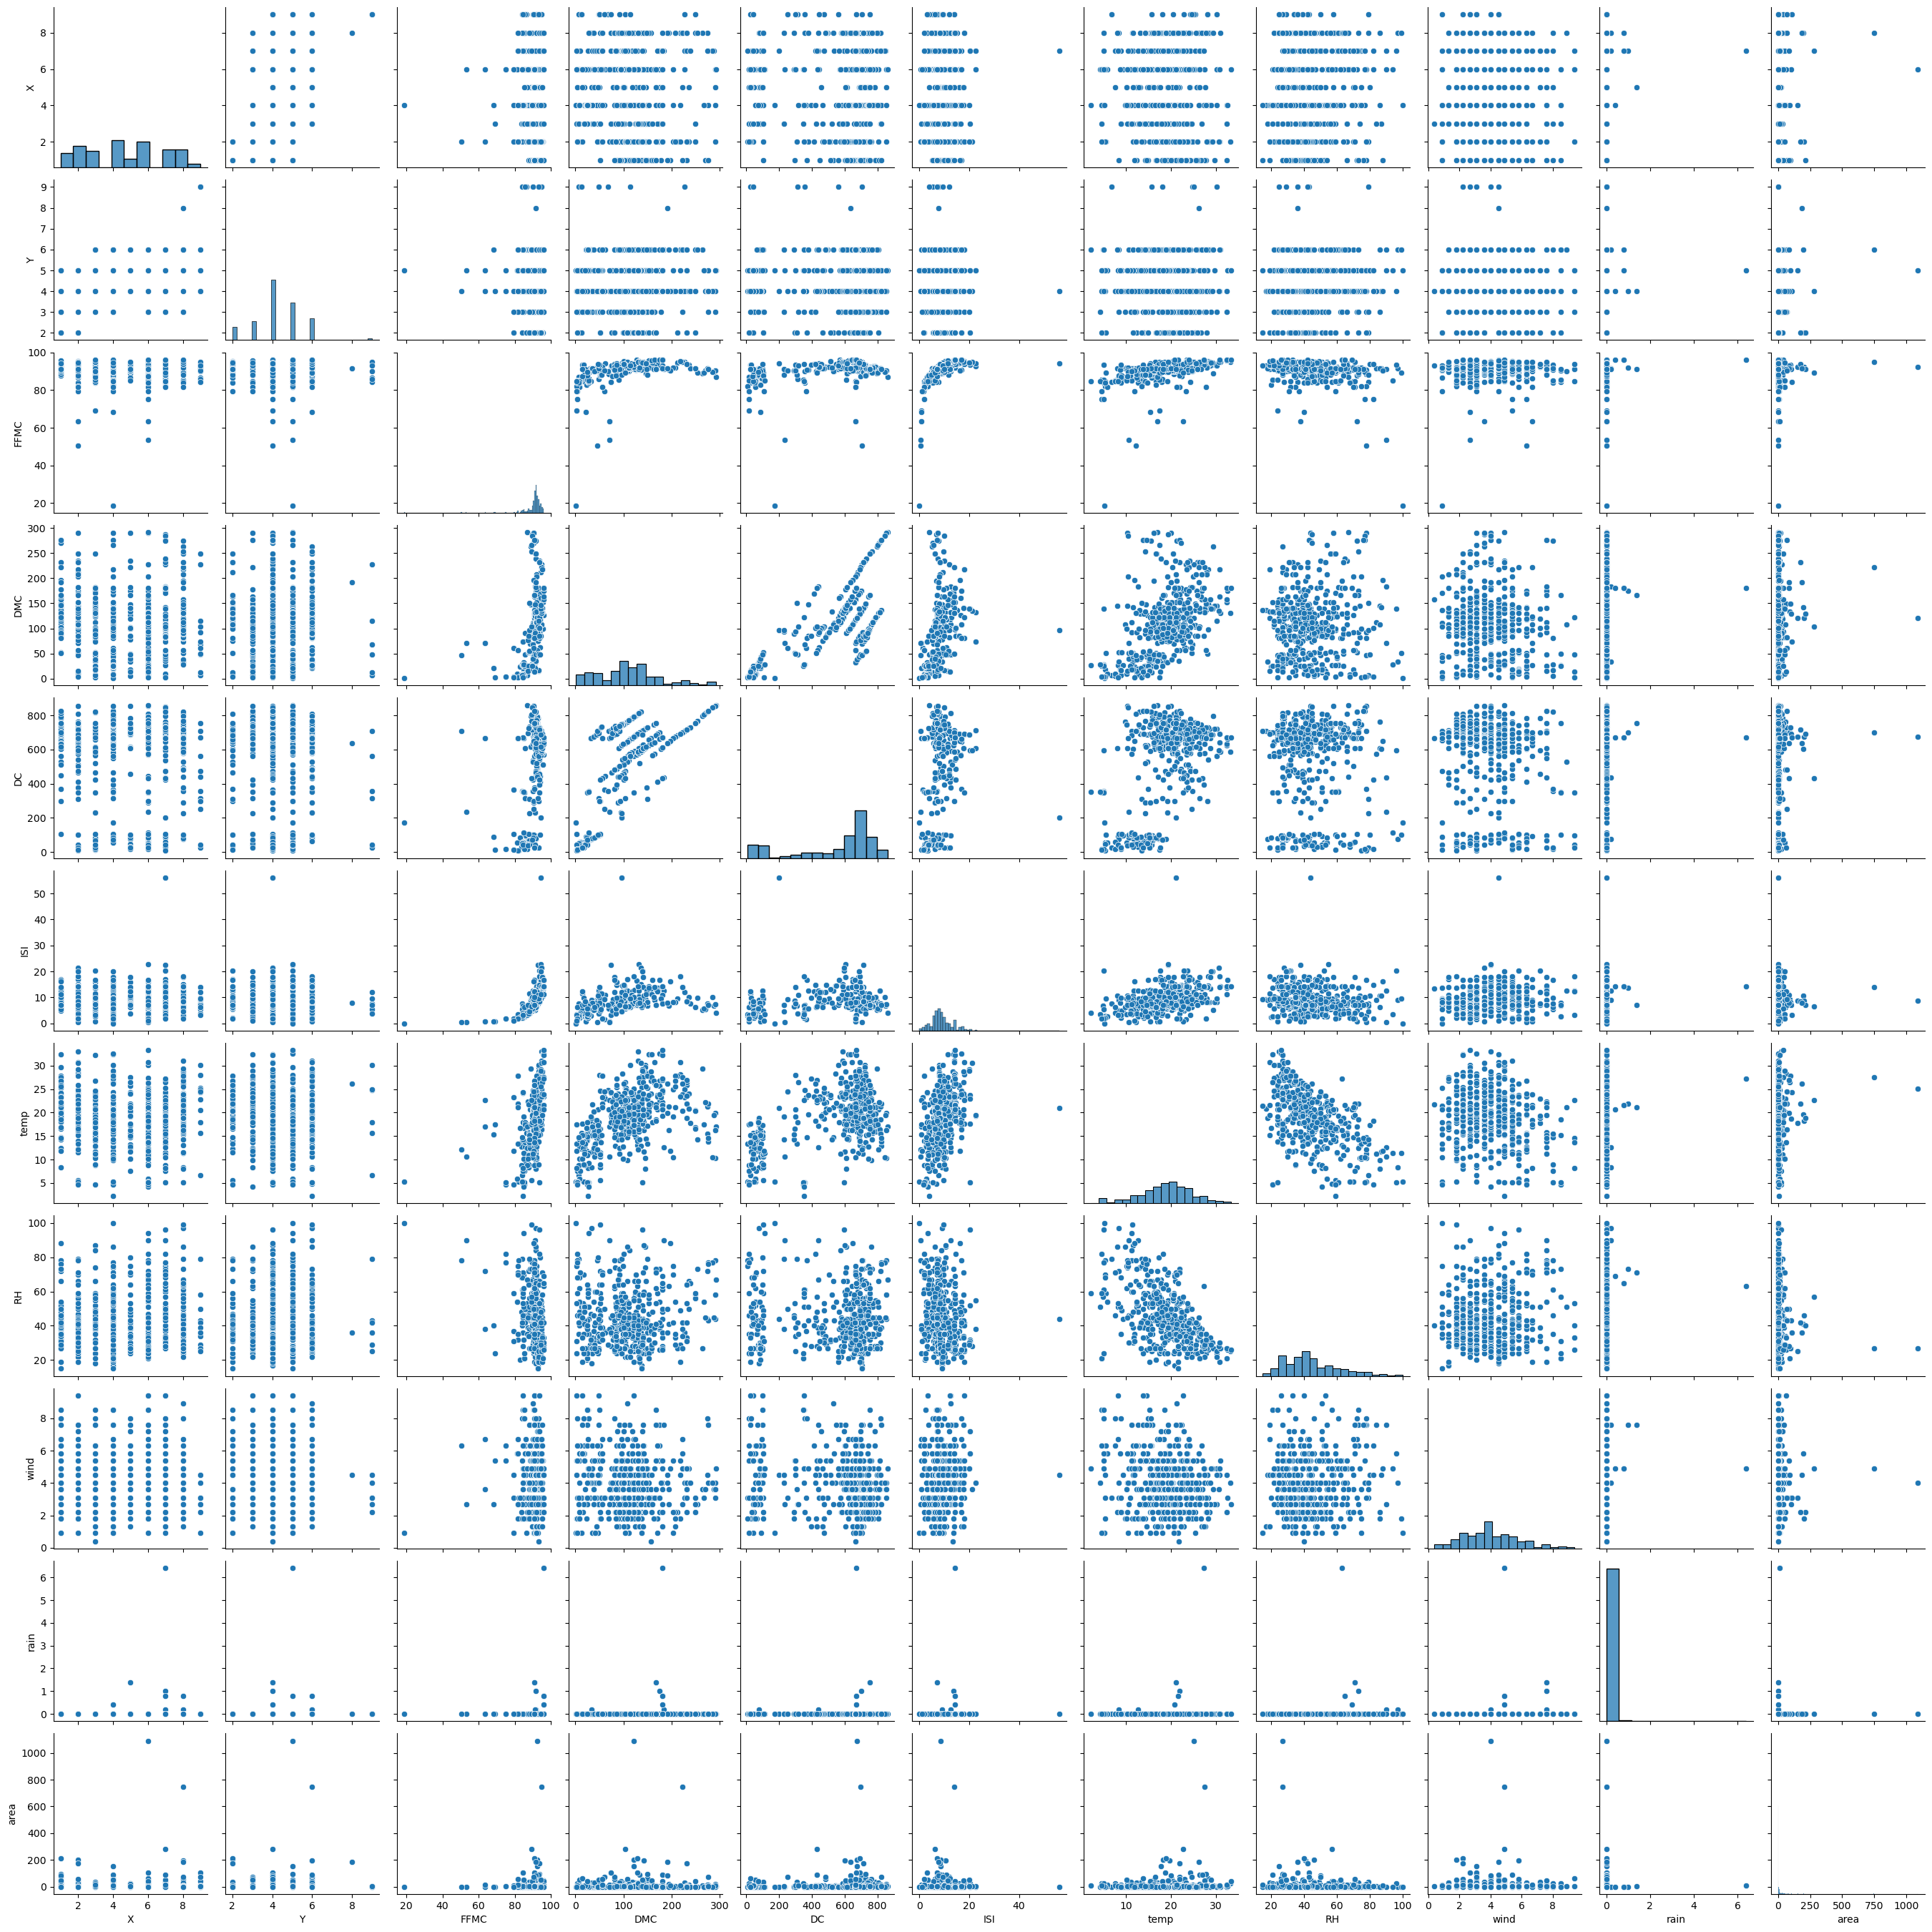

In [9]:
#Representación gráfica de las relaciones
sns.pairplot(dfa_num, height=2.5);
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> identificad los 2 atributos que tienen una correlación más fuerte con la respuesta y los 3 con una correlación más débil (coeficiente de correlación mayor o menor en valor absoluto).
    
Para observar y analizar las correlaciones gráficamente, representad, para cada uno de los 5 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, en cada gráfico añadid la representación de una regresión lineal que fite los puntos.
        
<hr>Sugerencia: podéis usar la función "regplot" de la librería 'seaborn'.
</div>

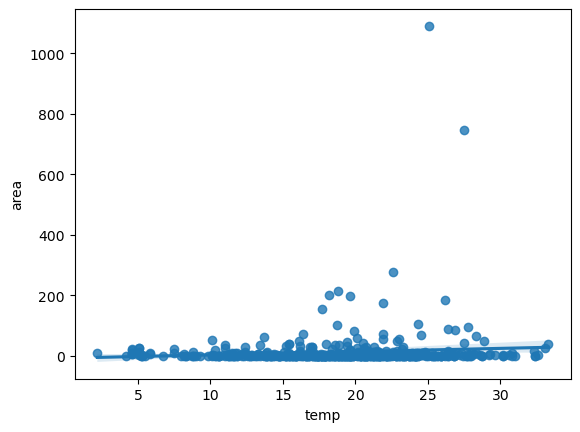

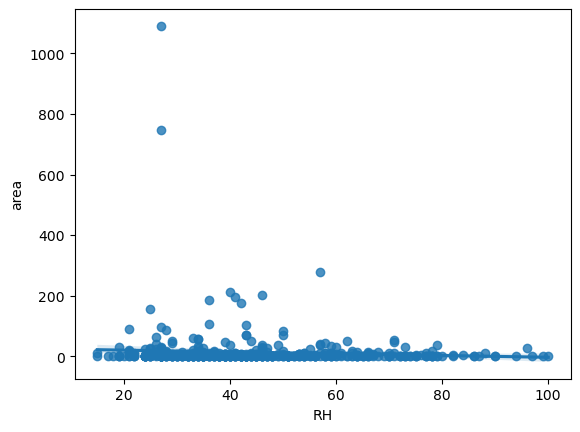

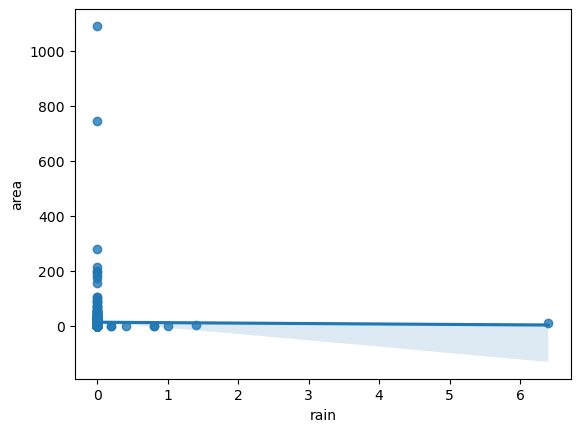

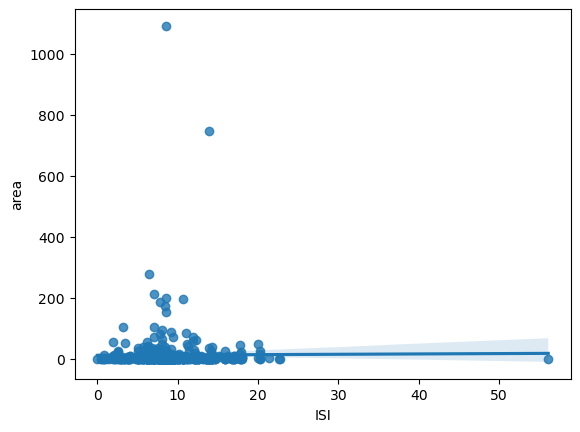

In [10]:
sns.regplot(x = "temp", y = "area", data = df)
plt.show()

sns.regplot(x = "RH", y = "area", data = df)
plt.show()

sns.regplot(x = "rain", y = "area", data = df)
plt.show()

sns.regplot(x = "ISI", y = "area", data = df)
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> observando los gráficos, comentad brevemente si conseguís ver las altas o bajas correlaciones que habíais identificado numéricamente.
</div>

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid black; padding: 0.5em;">
En los gráficos de dispersión se puede ver que tanto en temp como RH no existe prácticamente dispersión.<br>
</div>

# 3. Preprocesado de los datos (3 puntos)

Una vez analizados los atributos descriptivos, es el momento de prepararlos para que nos sean útiles de cara a predecir valores. En este apartado:
<li>Transformaremos las variables categóricas en varias variables binarias, una para cada categoría.</li>
<li>Estandarizaremos los valores de los atributos descriptivos para que sus escalas no sean muy diferentes.</li>
<li>Separaremos el conjunto de datos original en dos subconjuntos: entrenamiento y test.</li>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> elimina los atributos categóricos del conjunto de datos y en su lugar introduce la transformación de dichos atributos a tantas variables binarias como categorías tengan.
<hr>
Sugerencia: utilizad la función "get_dummies" de "pandas".
</div>

In [11]:
dfa_prepro = pd.concat([dfa.drop('month', axis=1), pd.get_dummies(dfa['month'])], axis=1)
dfa_prepro = pd.concat([dfa_prepro.drop('day', axis=1), pd.get_dummies(dfa_prepro['day'])], axis=1)
dfa_prepro.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
278,4,4,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
109,4,5,88.6,91.8,709.9,7.1,17.4,56,5.4,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
301,6,5,90.4,93.3,298.1,7.5,19.1,39,5.4,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
300,6,5,90.4,93.3,298.1,7.5,20.7,25,4.9,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
31,6,3,88.6,91.8,709.9,7.1,11.2,78,7.6,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> estandariza todos los atributos descriptivos.
<hr>
Sugerencia: utilizad "StandardScaler" de "preprocessing".
</div>

In [12]:
scaler = preprocessing.StandardScaler()

dfa_prepro_scaled = scaler.fit_transform(dfa_prepro)
print(dfa_prepro_scaled)

[[-0.28952383 -0.24400101 -0.95102446 ... -0.36574845 -0.37587279
  -0.34151233]
 [-0.28952383  0.56986043 -0.37076451 ... -0.36574845 -0.37587279
  -0.34151233]
 [ 0.57570057  0.56986043 -0.04436828 ... -0.36574845 -0.37587279
  -0.34151233]
 ...
 [ 1.44092498  1.38372188 -1.64008316 ... -0.36574845 -0.37587279
  -0.34151233]
 [-0.28952383 -1.05786246  0.5540248  ... -0.36574845 -0.37587279
  -0.34151233]
 [ 0.57570057 -1.05786246  0.19136233 ... -0.36574845 -0.37587279
  -0.34151233]]


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> separa los atributos descriptivos y la variable objetivo en los subconjuntos de entrenamiento y test.
<hr>
Sugerencia: para separar entre train y test podéis usar "train_test_split" de sklearn.<br>
</div>

In [13]:
train, test = train_test_split(dfa_prepro, random_state = 0)
print(train.shape)
print(test.shape)

X_train, X_test, area_train, area_test = train_test_split(dfa_prepro, df["area"], test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(area_train.shape)
print(area_test.shape)

(387, 29)
(130, 29)
(361, 29)
(156, 29)
(361,)
(156,)


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> explica si la decisión de transformar el conjunto de datos (variables categóricas y estandarización) antes de realizar la separación del conjunto de datos en los subconjuntos de entrenamiento y test es una buena idea.
</div>


<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid black; padding: 0.5em;">
<strong>Si es una buena idea</strong> ya que la mayoría de las técnicas estadísticas y de aprendizaje automático tienen como requisito que las variables estén en una escala similar. De esta manera, se asegura que los subconjuntos de entrenamiento y prueba tengan las mismas transformaciones y sean representativos del conjunto de datos original. La estandarización de las variables puede mejorar la estabilidad y el rendimiento del modelo.<br>
</div>

# 4. Reducción de la dimensionalidad (2 puntos)

Con el propósito de comprobar visualmente la distribución de la variable objetivo teniendo en cuenta todos los atributos descriptivos a la vez, vamos a reducir la dimensionalidad del problema a solamente dos atributos que serán la proyección de los atributos descriptivos originales.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplicad el método de reducción de la dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Generad un gráfico con el resultado del PCA en el que se muestre, en función de los valores de las dos componentes en los ejes x e y, el valor de la variable objetivo usando la escala de colores. El objetivo es visualizar la variación de la variable objetivo en función de los valores de las componentes principales generadas.</li>
</ul>
    
NOTA: cuidado, no incluyáis la variable objetivo en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: no es necesario que programéis el algoritmo de PCA, podéis usar la implementación disponible en la librería de "scikit-learn".<br>
Sugerencia: para el gráfico, podéis usar el scatter plot de matplotlib con el parámetro "c", que indica el color de los puntos, igual a la variable objetivo.<br>
Sugerencia: utilizad el parámetro "norm=matplotlib.colors.LogNorm()" dentro del "scatter" para mostrar de forma logarítmica el área quemada de bosque.
</div>

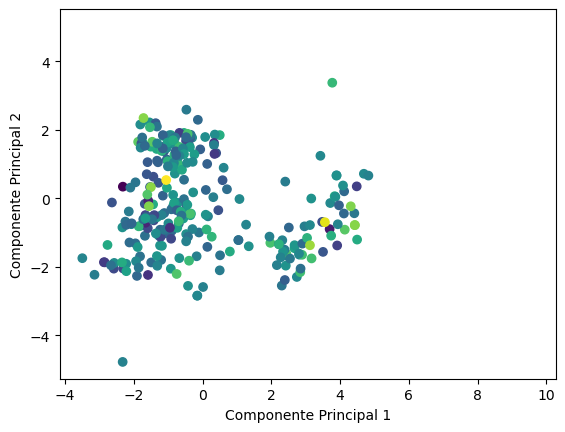

In [14]:
# Estandariza los datos
scaler = StandardScaler()
dfa_prepro_scaled = scaler.fit_transform(dfa_prepro)

# Aplica PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
dfa_prepro_scaled_pca = pca.fit_transform(dfa_prepro_scaled)

# Visualiza los datos en 2 dimensiones
plt.scatter(dfa_prepro_scaled_pca[:, 0], dfa_prepro_scaled_pca[:, 1], c=df["area"],norm=matplotlib.colors.LogNorm())
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Repetid la reducción de dimensionalidad, pero en este caso usando TSNE.  Podéis encontrar más información sobre este algoritmo en el link: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, generad un gráfico con el resultado del TSNE en el que se muestre, en función de los valores de las 2 nuevas dimensiones en los ejes x e y, el valor de la variable objetivo usando una escala de colores.</li>
</ul>

<hr>
Sugerencia: no es necesario que programéis el algoritmo TSNE, podéis usar la implementación disponible en la librería de "scikit-learn".<br>
Sugerencia: a parte de especificar el número de componentes, probad a usar los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: para el gráfico, podéis usar el scatter plot de matplotlib con el parámetro "c", que indica el color de los puntos, igual a la variable objetivo.<br>
Sugerencia: utilizad el parámetro "norm=matplotlib.colors.LogNorm()" dentro del "scatter" para mostrar de forma logarítmica el área quemada de bosque.
</div>

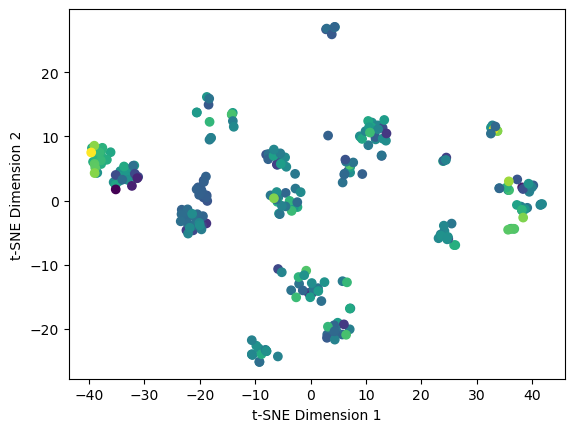

In [15]:


from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Carga el conjunto de datos de iris
iris = load_iris()

# Estandariza los datos
scaler = StandardScaler()
dfa_prepro_scaled = scaler.fit_transform(dfa_prepro)

# Aplica t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2)
dfa_prepro_scaled_tsne = tsne.fit_transform(dfa_prepro_scaled)

# Visualiza los datos en 2 dimensiones
plt.scatter(dfa_prepro_scaled_tsne[:, 0], dfa_prepro_scaled_tsne[:, 1], c=df["area"],norm=matplotlib.colors.LogNorm())
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

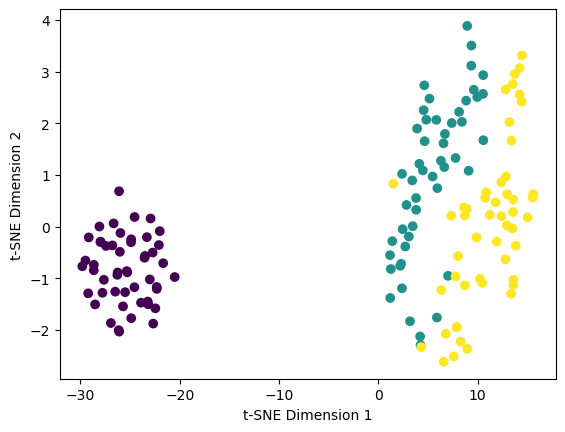

In [16]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Carga el conjunto de datos de iris
iris = load_iris()

# Estandariza los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(iris.data)

# Aplica t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_std)

# Visualiza los datos en 2 dimensiones
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> observando los dos gráficos, ¿creéis que ha funcionado bien la reducción de dimensionalidad? ¿Os parece que las 2 nuevas dimensiones consiguen explicar la variación de la variable objetivo y visualizar diferenciadamente áreas de indendio grandes o pequeñas? ¿Si utilizásemos las 2 nuevas variables para predecir la variable objetivo, serían buenos los resultados obtenidos?
    
¿Por qué obtenemos resultados tan diferentes con los dos métodos?
</div>

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Observando los dos gráficos, podemos ver que tanto PCA como t-SNE han logrado reducir la dimensionalidad del conjunto de datos a dos dimensiones, lo que permite una visualización más clara de los patrones en los datos. Sin embargo, es difícil decir si estas dos nuevas dimensiones explican la variación de la variable objetivo sin conocer más detalles sobre el conjunto de datos y el problema específico que estamos intentando resolver.<br/>
    
En cuanto a por qué obtenemos resultados diferentes con PCA y t-SNE, ambos métodos son diferentes y tienen sus propias ventajas y desventajas. PCA es un método lineal que busca las direcciones principales de variación en los datos, mientras que t-SNE es un método no lineal que intenta preservar las distancias locales entre los puntos. Dependiendo del conjunto de datos y el problema específico, uno de los métodos puede funcionar mejor que el otro.

Respecto a si podríamos utilizar estas dos nuevas variables para predecir la variable objetivo, es difícil saberlo sin más detalles sobre el conjunto de datos y el problema específico. En general, la reducción de dimensionalidad puede ser útil para mejorar la eficiencia computacional y ayudar a visualizar los patrones en los datos, pero también puede haber una pérdida de información en el proceso de reducción de dimensionalidad.


</div>




# 5. Entrenamiento y test (1 punto)

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Random Forest para regresión, con el objetivo de predecir la variable objetivo y evaluar la precisión obtenida con el modelo. Para ello:
<ul>
    <li>Entrenaremos el modelo con el conjunto de entrenamiento y veremos qué tal se comporta tanto con el subconjunto de entrenamiento como con el de test.</li>
    <li>Analizaremos si el resultado obtenido tiene sentido y veremos si se puede mejorar de alguna forma.</li>
</ul>
<br>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> usando el conjunto de datos preprocesado (variables categóricas y estandarización) sin aplicar reducción de la dimensionalidad:
<ul>
    <li>Definid un modelo Random Forest (fijando n_estimators=100 y random_state=seed).</li>
    <li>Mostrad la precisión del modelo tanto en el subconjunto de entrenamiento como de test.</li>
</ul>
<hr>
Sugerencia: para entrenar un modelo random forest podéis usar "RandomForestRegressor" de sklearn.<br>
Sugerencia: para mostrar la precisión del modelo podéis usar el método "score" del propio modelo.<br>
</div>

MSE train: 353.839, test: 6886.402
R^2 train: 0.840, test: 0.163


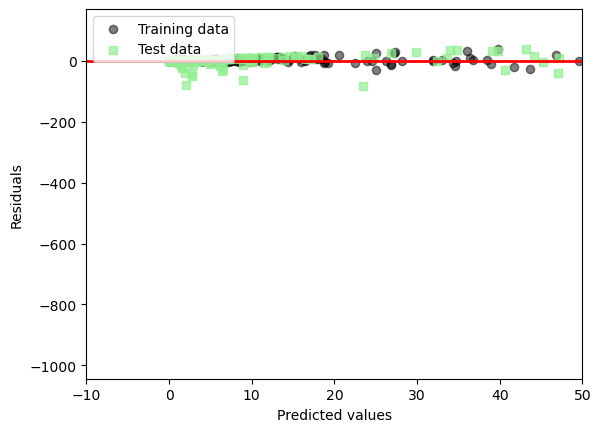

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

forest = RandomForestRegressor(n_estimators=1000,random_state=seed)
forest.fit(X_train, area_train)
area_train_pred = forest.predict(X_train)
area_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(area_train, area_train_pred),mean_squared_error(area_test, area_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(area_train, area_train_pred),r2_score(area_test, area_test_pred)))

plt.scatter(area_train_pred,area_train_pred - area_train,c='black',marker='o',s=35,alpha=0.5,label='Training data')
plt.scatter(area_test_pred,area_test_pred - area_test,c='lightgreen', marker='s',s=35,alpha=0.7,label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> explica por qué la precisión del modelo sobre los valores de entrenamiento y test presentan esos valores.
</div>

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid black; padding: 0.5em;">
    En el gráfico se muestran valores muy similares para los datos de entrenamiento y de test.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> discutid qué técnicas podríais aplicar para mejorar la situación actual del modelo.
</div>

<div style="background-color: grey; border-color: #7C9DBF; border-left: 5px solid black; padding: 0.5em;">
    <ul>
        <li>Utilizar técnicas de selección de características: La selección de características puede ser útil para mejorar el rendimiento del modelo, ya que permite reducir la complejidad del modelo y evitar el sobreajuste.</li>
        <li>Incrementar el volumen de datos: El aumento de datos puede ser una estrategia efectiva para mejorar el rendimiento del modelo, especialmente en este conjunto de datos que es pequeño.</li>
    </ul>
</div>